In [39]:
# 1
import pandas as pd
import torch

In [21]:
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [24]:
from sklearn.model_selection import train_test_split

X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=32,
                                                    stratify=y)

Adam optimization is used to improve training speeds in deep neural networks and reach convergence quickly. It works using different parameters such as foreach to optimiize the data better. Momentum and Root Mean Square Propagation make up Adam optimization. Foreach and fused implementations are mostly used in implementing Adam.

In [34]:
import torch.nn as nn
from torch.optim import Adam
import torch.nn.functional as F

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)
print(X_train)

tensor([[  4.0000, 146.0000,  85.0000,  ...,  28.9000,   0.1890,  27.0000],
        [  5.0000,  96.0000,  74.0000,  ...,  33.6000,   0.9970,  43.0000],
        [  6.0000, 107.0000,  88.0000,  ...,  36.8000,   0.7270,  31.0000],
        ...,
        [ 17.0000, 163.0000,  72.0000,  ...,  40.9000,   0.8170,  47.0000],
        [  0.0000, 167.0000,   0.0000,  ...,  32.3000,   0.8390,  30.0000],
        [  2.0000, 134.0000,  70.0000,  ...,  28.9000,   0.5420,  23.0000]])


In [36]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.layer_1_connection = nn.Linear(input_features,hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
        
    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

In [30]:
torch.manual_seed(32)
ann = ANN_Model()

In [32]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(ann.parameters(), lr=0.01)

In [41]:
final_loss=[]
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)
    
    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss: {loss}')
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 with loss: 0.48792150616645813
Epoch number: 11 with loss: 0.4995611011981964
Epoch number: 21 with loss: 0.4904424250125885
Epoch number: 31 with loss: 0.4914374053478241
Epoch number: 41 with loss: 0.4897993505001068
Epoch number: 51 with loss: 0.4865042269229889
Epoch number: 61 with loss: 0.5090890526771545
Epoch number: 71 with loss: 0.4889267683029175
Epoch number: 81 with loss: 0.4915037751197815
Epoch number: 91 with loss: 0.4894569516181946
Epoch number: 101 with loss: 0.49507445096969604
Epoch number: 111 with loss: 0.5023568868637085
Epoch number: 121 with loss: 0.4838205575942993
Epoch number: 131 with loss: 0.47946569323539734
Epoch number: 141 with loss: 0.4764936566352844
Epoch number: 151 with loss: 0.46209394931793213
Epoch number: 161 with loss: 0.5071160793304443
Epoch number: 171 with loss: 0.5094401836395264
Epoch number: 181 with loss: 0.4915049076080322
Epoch number: 191 with loss: 0.46655744314193726
Epoch number: 201 with loss: 0.472288370132446

In [43]:
y_pred = []

with torch.no_grad():
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of ticklabels (233).

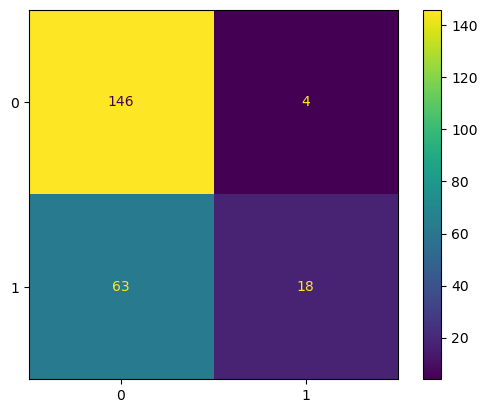

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [45]:
def precision_and_recall(type: str, tp: int, tn: int, 
                        fp: int, fn: int) -> float:
    """
    This function produces precision or recall based on
    what is passed in
    """
    value = 0
    if type == "precision":
        value = tp / (tp + fp)
        return value
    elif type == "recall":
        value = tp / (tp + fn)
        return value
    else:
        error_msg = "something went wrong"
        return error_msg

In [51]:
precision_and_recall("precision",45,131,19,36)

0.703125

In [52]:
precision_and_recall("recall",45,131,19,36)

0.5555555555555556

In [48]:
precision_and_recall("precision",18,146, 4,63)

0.8181818181818182

In [49]:
precision_and_recall("recall",18,146, 4,63)

0.2222222222222222

The model performs well with the RMSprop optimizer. It performed better based on precision, but it dropped in recall. Therefore, it can be assumed that the model did perform better than Adam. This might be because the dataset is smaller while Adam is better suited for larger datasets and deeper networks.

In [23]:
#2

def divisor_count(x):
    divisors = []
    for i in range(1, x + 1):
        if x % i == 0:
            divisors.append(i)
    return len(divisors), divisors

x = 5
num_divisors, divisors_list = divisor_count(x)
print(f"There are {num_divisors} divisors: {divisors_list}")

There are 2 divisors: [1, 5]
